# Alex McGraw, Brett Nesfeder, Siddhant Chauhan

In [302]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline


Populating the interactive namespace from numpy and matplotlib


Q1

In [283]:
#Q1
df_gold = pd.read_csv('gold.txt', sep = "\t", names = ["url", "category"] )
df_labels = pd.read_csv('labels.txt', sep = "\t", names = ["turk", "url", "category"])

In [284]:
df_gold[:5]

,url,category
0,http://0800-horoscope.com,G
1,http://18games.net,X
2,http://1pixelout.net,G
3,http://1porno.com/004/teens/index.html,X
4,http://1stpussy.com/005/16/index.html,X


In [285]:
df_labels[:5]

,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G


Q2

In [286]:
#Q2
mask = df_labels['url'].isin(df_gold['url'])
labels_on_gold = df_gold.merge(df_labels, left_on = df_gold['url'], 
                                right_on=df_labels['url'], 
                                suffixes = ('_gold', '_labels'))
labels_on_gold['matches'] = (labels_on_gold['category_gold'] == 
                              labels_on_gold['category_labels']).astype(int)


labels_unknown = df_labels[~mask]
labels_unknown.columns

Index(['turk', 'url', 'category'], dtype='object')

In [287]:
labels_on_gold[:10]

,key_0,url_gold,category_gold,turk,url_labels,category_labels,matches
0,http://0800-horoscope.com,http://0800-horoscope.com,G,A1253FXHCZ9CWM,http://0800-horoscope.com,G,1
1,http://0800-horoscope.com,http://0800-horoscope.com,G,A153PKAL7OAY36,http://0800-horoscope.com,G,1
2,http://0800-horoscope.com,http://0800-horoscope.com,G,A1FV9SAPL5C6KY,http://0800-horoscope.com,G,1
3,http://0800-horoscope.com,http://0800-horoscope.com,G,A1JTOT0DWM6QGL,http://0800-horoscope.com,G,1
4,http://0800-horoscope.com,http://0800-horoscope.com,G,A1PXXEOGQ76RNJ,http://0800-horoscope.com,G,1
5,http://0800-horoscope.com,http://0800-horoscope.com,G,A21US576U8SCO4,http://0800-horoscope.com,G,1
6,http://0800-horoscope.com,http://0800-horoscope.com,G,A22C0PJUBFJTI0,http://0800-horoscope.com,G,1
7,http://0800-horoscope.com,http://0800-horoscope.com,G,A270HOAHEVIFW0,http://0800-horoscope.com,G,1
8,http://0800-horoscope.com,http://0800-horoscope.com,G,A2EG8FHODTEV63,http://0800-horoscope.com,R,0
9,http://0800-horoscope.com,http://0800-horoscope.com,G,A2LM400F4F0V0M,http://0800-horoscope.com,G,1


In [288]:
rater_goodness = labels_on_gold.groupby('turk')[['category_labels','matches']]\
.agg({'category_labels':'count',
      'matches': 'sum'})
rater_goodness['pct_correct'] = rater_goodness['matches']/rater_goodness['category_labels']
rater_goodness

,category_labels,matches,pct_correct
turk,,,
A112DVP1KG4QZU,1,1,1.000000
A1253FXHCZ9CWM,29,15,0.517241
A12CY1Q7XKJJDE,1,1,1.000000
A12RE8G66WTO8B,20,15,0.750000
A12Y1GTGIQDGRA,3,1,0.333333
A13CEW9JGDWGX1,1,1,1.000000
A13OE9GBRJ0S2U,4,3,0.750000
A14IQ4GLNWNPOJ,1,1,1.000000
A153PKAL7OAY36,148,107,0.722973


In [289]:
labels_on_gold[:10]

,key_0,url_gold,category_gold,turk,url_labels,category_labels,matches
0,http://0800-horoscope.com,http://0800-horoscope.com,G,A1253FXHCZ9CWM,http://0800-horoscope.com,G,1
1,http://0800-horoscope.com,http://0800-horoscope.com,G,A153PKAL7OAY36,http://0800-horoscope.com,G,1
2,http://0800-horoscope.com,http://0800-horoscope.com,G,A1FV9SAPL5C6KY,http://0800-horoscope.com,G,1
3,http://0800-horoscope.com,http://0800-horoscope.com,G,A1JTOT0DWM6QGL,http://0800-horoscope.com,G,1
4,http://0800-horoscope.com,http://0800-horoscope.com,G,A1PXXEOGQ76RNJ,http://0800-horoscope.com,G,1
5,http://0800-horoscope.com,http://0800-horoscope.com,G,A21US576U8SCO4,http://0800-horoscope.com,G,1
6,http://0800-horoscope.com,http://0800-horoscope.com,G,A22C0PJUBFJTI0,http://0800-horoscope.com,G,1
7,http://0800-horoscope.com,http://0800-horoscope.com,G,A270HOAHEVIFW0,http://0800-horoscope.com,G,1
8,http://0800-horoscope.com,http://0800-horoscope.com,G,A2EG8FHODTEV63,http://0800-horoscope.com,R,0
9,http://0800-horoscope.com,http://0800-horoscope.com,G,A2LM400F4F0V0M,http://0800-horoscope.com,G,1


Q3

In [290]:
rater_goodness = labels_on_gold.groupby('turk')[['category_labels','matches']]\
.agg({'category_labels':'count',
      'matches': 'sum'})
rater_goodness['pct_correct'] = rater_goodness['matches']/rater_goodness['category_labels']
rater_goodness

,category_labels,matches,pct_correct
turk,,,
A112DVP1KG4QZU,1,1,1.000000
A1253FXHCZ9CWM,29,15,0.517241
A12CY1Q7XKJJDE,1,1,1.000000
A12RE8G66WTO8B,20,15,0.750000
A12Y1GTGIQDGRA,3,1,0.333333
A13CEW9JGDWGX1,1,1,1.000000
A13OE9GBRJ0S2U,4,3,0.750000
A14IQ4GLNWNPOJ,1,1,1.000000
A153PKAL7OAY36,148,107,0.722973


Q4

In [291]:
rater_goodness['odds'] = (rater_goodness['pct_correct']/(1.001 -
                                                        rater_goodness['pct_correct']))
rater_goodness

,category_labels,matches,pct_correct,odds
turk,,,,
A112DVP1KG4QZU,1,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,15,0.517241,1.069214
A12CY1Q7XKJJDE,1,1,1.000000,1000.000000
A12RE8G66WTO8B,20,15,0.750000,2.988048
A12Y1GTGIQDGRA,3,1,0.333333,0.499251
A13CEW9JGDWGX1,1,1,1.000000,1000.000000
A13OE9GBRJ0S2U,4,3,0.750000,2.988048
A14IQ4GLNWNPOJ,1,1,1.000000,1000.000000
A153PKAL7OAY36,148,107,0.722973,2.600369


Q5

In [292]:
over_20_turks_mask = (rater_goodness['category_labels'] >= 20)
over_20_turks = rater_goodness[over_20_turks_mask]
top_10_turks = over_20_turks.sort_values('pct_correct', ascending = False)[:10]
top_10_turks

,category_labels,matches,pct_correct,odds
turk,,,,
A2U0R4X38GUKZE,20,19,0.950000,18.627451
A22C0PJUBFJTI0,36,33,0.916667,10.869565
A23YQUBXZPKILZ,24,21,0.875000,6.944444
ATVALOQVDCMZW,103,88,0.854369,5.826657
A1HIXWH4OXT8S4,40,33,0.825000,4.687500
A3220HG1O83HQ4,22,18,0.818182,4.475385
A32W20KGQXS0LL,25,20,0.800000,3.980100
A20PWAB7G3HDHU,20,16,0.800000,3.980100
AJSJVK40F5HM6,28,22,0.785714,3.649635


Q6

(array([ 2.,  0.,  2.,  5.,  9., 15., 26., 21., 12.,  8.]),
 array([0.10204082, 0.19183673, 0.28163265, 0.37142857, 0.46122449,
        0.55102041, 0.64081633, 0.73061224, 0.82040816, 0.91020408,
        1.        ]),
 <a list of 10 Patch objects>)

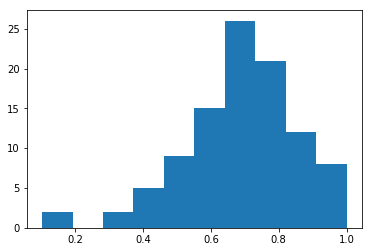

In [293]:
top_labelers_100 = rater_goodness.sort_values('category_labels', ascending = False)[:100]
hist(top_labelers_100['pct_correct'])

The histogram above is based off of the top 100 turks who have given the most ratings. I do not believe that the number of ratings that a turker gives is related to their accuracy. While there are some who do reach the 90%-100% range, the median is at 70%, while there are many that are still lower. While this does not prove that a majority are people spamming the system, it does appear that these raters do not think long before rating a URL.

Q7

In [294]:
one_gold_mask = (rater_goodness['category_labels'] >= 1)
one_gold = rater_goodness[one_gold_mask].sort_values('category_labels', ascending = False)
top_25_pct_num = one_gold['category_labels'].quantile(.75)
top_25_pct = rater_goodness[rater_goodness['category_labels'] >= top_25_pct_num].sort_values('category_labels', ascending=False)
top_25_pct['overall odds'] =(top_25_pct['pct_correct']/(1.001 -
                                                        top_25_pct['pct_correct']))

pop = top_25_pct.index
gold_turk_unknown = labels_unknown[labels_unknown['turk'].isin(pop)]
gold_turk_unknown = gold_turk_unknown.merge(top_25_pct, on='turk')
gold_turk_unknown_pivot = pd.pivot_table(gold_turk_unknown,
                                        index = 'url',
                                        columns = 'category',
                                        values = 'overall odds',
                                        aggfunc = {'overall odds':np.prod},
                                        fill_value = 0)

gold_turk_unknown_pivot.sort_values(by = 'G', ascending=False)


category,G,P,R,X
url,,,,
http://affiliatetips.com,1.631168e+06,0.000000,0.000000,0.000000
http://daniweb.com,8.486887e+05,0.113510,0.000000,0.000000
http://directline-holidays.co.uk,4.238277e+05,0.113510,0.000000,0.000000
http://directmag.com,4.238277e+05,0.113510,0.000000,0.000000
http://dailyom.com,3.559631e+05,0.000000,0.000000,0.000000
http://actuarialoutpost.com,2.426544e+05,0.113510,0.000000,0.000000
http://activemusician.com,2.426544e+05,0.000000,0.113510,0.000000
http://actden.com,2.426544e+05,0.113510,0.000000,0.000000
http://drugstore.com,2.391723e+05,1.440922,0.000000,0.000000


Q8

In [295]:
gold_turk_unstacked = gold_turk_unknown_pivot.sort_values(by = 'G', ascending=False).unstack('category').reset_index().set_index('url')
gold_turk_unstacked.columns = ['category', 'overall odds']
gold_turk_unstacked.columns
result_75 = gold_turk_unstacked.loc[gold_turk_unstacked.groupby(by='url', as_index=True)['overall odds'].idxmax()]
result_75.sort_values('overall odds', ascending=False)

,category,overall odds
url,,
http://affiliatetips.com,G,1.631168e+06
http://daniweb.com,G,8.486887e+05
http://asiaporno.com,X,5.632515e+05
http://directmag.com,G,4.238277e+05
http://directline-holidays.co.uk,G,4.238277e+05
http://dailydesi.com,X,3.559631e+05
http://dailyom.com,G,3.559631e+05
http://actden.com,G,2.426544e+05
http://activemusician.com,G,2.426544e+05


Q9

In [296]:
one_gold_mask = (rater_goodness['category_labels'] >= 1)
one_gold = rater_goodness[one_gold_mask].sort_values('category_labels', ascending = False)
top_75_pct_num = one_gold['category_labels'].quantile(.25)
top_75_pct = rater_goodness[rater_goodness['category_labels'] >= top_75_pct_num].sort_values('category_labels', ascending=False)
top_75_pct['overall odds'] =(top_75_pct['pct_correct']/(1.001 -
                                                        top_75_pct['pct_correct']))

pop = top_75_pct.index
gold_turk_unknown2 = labels_unknown[labels_unknown['turk'].isin(pop)]
gold_turk_unknown2 = gold_turk_unknown.merge(top_75_pct, on='turk')
gold_turk_unknown_pivot2 = pd.pivot_table(gold_turk_unknown,
                                        index = 'url',
                                        columns = 'category',
                                        values = 'overall odds',
                                        aggfunc = {'overall odds':np.prod},
                                        fill_value = 0)

gold_turk_unknown_pivot2.sort_values(by = 'G', ascending=False)

category,G,P,R,X
url,,,,
http://affiliatetips.com,1.631168e+06,0.000000,0.000000,0.000000
http://daniweb.com,8.486887e+05,0.113510,0.000000,0.000000
http://directline-holidays.co.uk,4.238277e+05,0.113510,0.000000,0.000000
http://directmag.com,4.238277e+05,0.113510,0.000000,0.000000
http://dailyom.com,3.559631e+05,0.000000,0.000000,0.000000
http://actuarialoutpost.com,2.426544e+05,0.113510,0.000000,0.000000
http://activemusician.com,2.426544e+05,0.000000,0.113510,0.000000
http://actden.com,2.426544e+05,0.113510,0.000000,0.000000
http://drugstore.com,2.391723e+05,1.440922,0.000000,0.000000


In [300]:
gold_turk_unstacked2 = gold_turk_unknown_pivot2.sort_values(by = 'G', ascending=False).unstack('category').reset_index().set_index('url')
gold_turk_unstacked2.columns = ['category', 'overall odds']
gold_turk_unstacked2.columns
result_25 = gold_turk_unstacked2.loc[gold_turk_unstacked2.groupby(by='url', as_index=True)['overall odds'].idxmax()]
result_25.sort_values('overall odds', ascending=False)

,category,overall odds
url,,
http://affiliatetips.com,G,1.631168e+06
http://daniweb.com,G,8.486887e+05
http://asiaporno.com,X,5.632515e+05
http://directmag.com,G,4.238277e+05
http://directline-holidays.co.uk,G,4.238277e+05
http://dailydesi.com,X,3.559631e+05
http://dailyom.com,G,3.559631e+05
http://actden.com,G,2.426544e+05
http://activemusician.com,G,2.426544e+05


In [301]:
compared = result_75.merge(result_25, left_on='url',right_on='url',suffixes=['_75','_25'])
compared
pivot_75_25 = compared.pivot_table(index='category_75',
                               columns='category_25',
                               values='overall odds_25',
                               fill_value=0,
                               aggfunc='count',
                               margins=True)
print(pivot_75_25)

category_25      G      P      R      X     All
category_75                                    
G            10610  10610  10610  10610   42440
P            10610  10610  10610  10610   42440
R            10610  10610  10610  10610   42440
X            10610  10610  10610  10610   42440
All          42440  42440  42440  42440  169760


Originally, we had this last pivot table working when we used the odds, and not the overall odds from the gold_turk_unknown dataframe. When we changed it to include the overall odds column from the gold_turk_unstacked to the following dataframes, it ended up messing up this final pivot table. We have no idea what happened, so any explanation would be amazing. 